# A look at the joint likelihood ratio and joint score

In [2]:
import sys, os
sys.path.append('../')

import logging
import numpy as np
import matplotlib.pyplot as plt

from simulation.units import *

logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

In [5]:
theta_train = np.load("../data/samples/theta_train_0.npy").reshape((-1,2))
x_train = np.load("../data/samples/x_train_0.npy")
y_train = np.load("../data/samples/y_train_0.npy")
t_xz_train = np.load("../data/samples/t_xz_train_0.npy")
r_xz_train = np.load("../data/samples/r_xz_train_0.npy")

## Plot alpha, beta vs subhalo properties

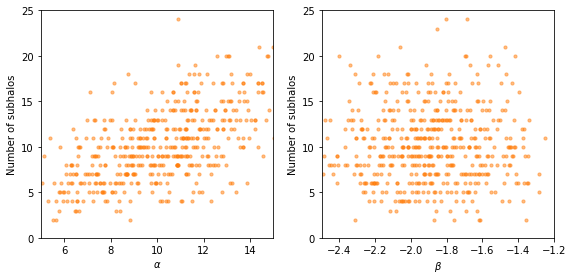

In [7]:
skip = 1000
fig = plt.figure(figsize=(8,4))

ax = plt.subplot(1,2,1)
#plt.scatter(theta_train[y_train==1][::skip, 0], n_subs_train[y_train==1][::skip], alpha=0.5, s=10., c='black')
plt.scatter(theta_train[y_train==0][::skip, 0], n_subs_train[y_train==0][::skip], alpha=0.5, s=10., c='C1')
plt.ylabel("Number of subhalos")
plt.xlabel(r"$\alpha$")
plt.ylim(0.,25.)
plt.xlim(5.,15.)

ax = plt.subplot(1,2,2)
#plt.scatter(theta_train[y_train==1][::skip, 1], n_subs_train[y_train==1][::skip], alpha=0.5, s=10., c='black')
plt.scatter(theta_train[y_train==0][::skip, 1], n_subs_train[y_train==0][::skip], alpha=0.5, s=10., c='C1')
plt.ylabel("Number of subhalos")
plt.xlabel(r"$\beta$")
plt.ylim(0.,25.)
plt.xlim(-2.5,-1.2)

plt.tight_layout()
plt.savefig("../figures/nsub_vs_theta.pdf")

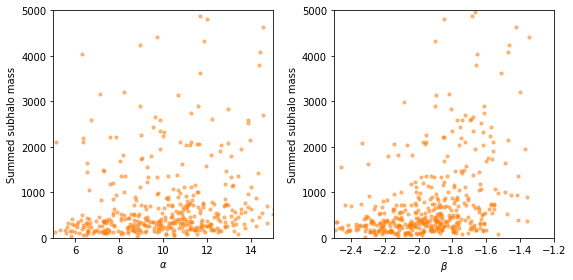

In [10]:
skip = 1000
fig = plt.figure(figsize=(8,4))

ax = plt.subplot(1,2,1)
#plt.scatter(theta_train[y_train==1][::skip, 0], m_subs_train[y_train==1][::skip], alpha=0.5, s=10., c='black')
plt.scatter(theta_train[y_train==0][::skip, 0], m_subs_train[y_train==0][::skip], alpha=0.5, s=10., c='C1')
plt.ylabel("Summed subhalo mass")
plt.xlabel(r"$\alpha$")
plt.ylim(0.,5000.)
plt.xlim(5,15)

ax = plt.subplot(1,2,2)
#plt.scatter(theta_train[y_train==1][::skip, 1], m_subs_train[y_train==1][::skip], alpha=0.5, s=10., c='black')
plt.scatter(theta_train[y_train==0][::skip, 1], m_subs_train[y_train==0][::skip], alpha=0.5, s=10., c='C1')
plt.ylabel("Summed subhalo mass")
plt.xlabel(r"$\beta$")
plt.ylim(0.,5000.)
plt.xlim(-2.5,-1.2)

plt.tight_layout()
plt.savefig("../figures/msub_vs_theta.pdf")

## Plot augmented data vs n_subs

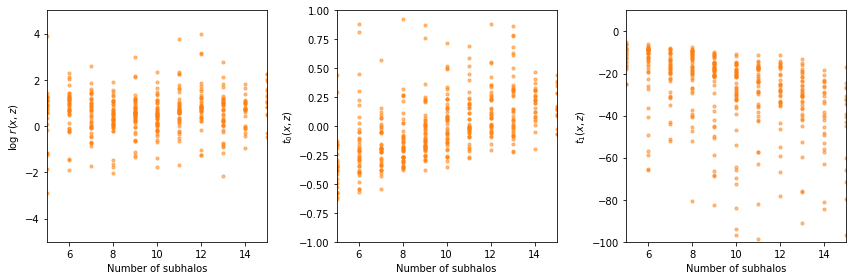

In [12]:
skip = 1000
fig = plt.figure(figsize=(12,4))

ax = plt.subplot(1,3,1)
#plt.scatter(n_subs_train[y_train==1][::skip], np.log(r_xz_train)[y_train==1][::skip], alpha=0.5, s=10., c='black')
plt.scatter(n_subs_train[y_train==0][::skip], np.log(r_xz_train)[y_train==0][::skip], alpha=0.5, s=10., c='C1')
plt.xlabel("Number of subhalos")
plt.ylabel(r"$\log \; r(x,z)$")
plt.xlim(5.,15.)
plt.ylim(-5,5.)

ax = plt.subplot(1,3,2)
#plt.scatter(n_subs_train[y_train==1][::skip], t_xz_train[y_train==1][::skip, 0], alpha=0.5, s=10., c='black')
plt.scatter(n_subs_train[y_train==0][::skip], t_xz_train[y_train==0][::skip, 0], alpha=0.5, s=10., c='C1')
plt.xlabel("Number of subhalos")
plt.ylabel(r"$t_0(x,z)$")
plt.xlim(5.,15.)
plt.ylim(-1,1)

ax = plt.subplot(1,3,3)
#plt.scatter(n_subs_train[y_train==1][::skip], t_xz_train[y_train==1][::skip, 1], alpha=0.5, s=10., c='black')
plt.scatter(n_subs_train[y_train==0][::skip], t_xz_train[y_train==0][::skip, 1], alpha=0.5, s=10., c='C1')
plt.xlabel("Number of subhalos")
plt.ylabel(r"$t_1(x,z)$")
plt.xlim(5.,15.)
plt.ylim(-100.,10.)

plt.tight_layout()
plt.savefig("../figures/nsub_vs_gold.pdf")

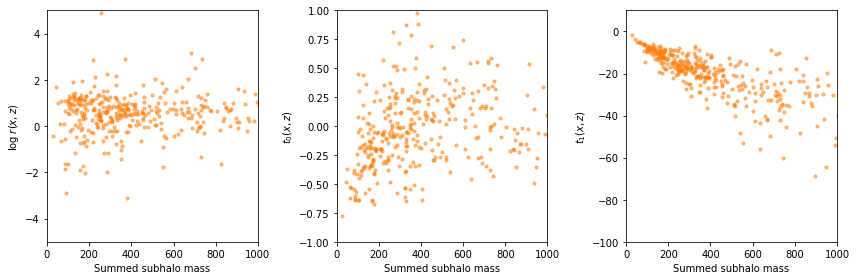

In [13]:
skip = 1000
fig = plt.figure(figsize=(12,4))

ax = plt.subplot(1,3,1)
#plt.scatter(m_subs_train[y_train==1][::skip], np.log(r_xz_train)[y_train==1][::skip], alpha=0.5, s=10., c='black')
plt.scatter(m_subs_train[y_train==0][::skip], np.log(r_xz_train)[y_train==0][::skip], alpha=0.5, s=10., c='C1')
plt.xlabel("Summed subhalo mass")
plt.ylabel(r"$\log \; r(x,z)$")
plt.xlim(0,1000.)
plt.ylim(-5,5.)

ax = plt.subplot(1,3,2)
#plt.scatter(m_subs_train[y_train==1][::skip], t_xz_train[y_train==1][::skip, 0], alpha=0.5, s=10., c='black')
plt.scatter(m_subs_train[y_train==0][::skip], t_xz_train[y_train==0][::skip, 0], alpha=0.5, s=10., c='C1')
plt.xlabel("Summed subhalo mass")
plt.ylabel(r"$t_0(x,z)$")
plt.xlim(0,1000.)
plt.ylim(-1,1)

ax = plt.subplot(1,3,3)
#plt.scatter(m_subs_train[y_train==1][::skip], t_xz_train[y_train==1][::skip, 1], alpha=0.5, s=10., c='black')
plt.scatter(m_subs_train[y_train==0][::skip], t_xz_train[y_train==0][::skip, 1], alpha=0.5, s=10., c='C1')
plt.xlabel("Summed subhalo mass")
plt.ylabel(r"$t_1(x,z)$")
plt.xlim(0,1000.)
plt.ylim(-100.,10.)

plt.tight_layout()
plt.savefig("../figures/msub_vs_gold.pdf")

## Everything

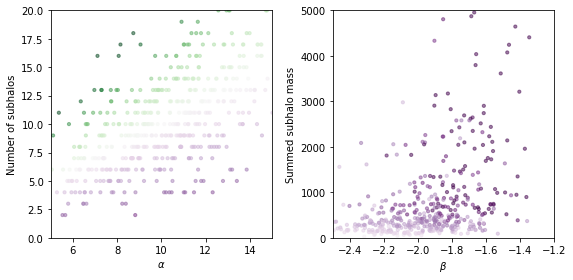

In [23]:
skip = 1000
fig = plt.figure(figsize=(8,4))

ax = plt.subplot(1,2,1)
plt.scatter(
    theta_train[y_train==0][::skip, 0], n_subs_train[y_train==0][::skip],
    c=t_xz_train[y_train==0][::skip,0], vmin=-1, vmax=1, cmap='PRGn',
    alpha=0.5, s=10.
)
plt.ylabel("Number of subhalos")
plt.xlabel(r"$\alpha$")
plt.ylim(0.,20.)
plt.xlim(5,15)

ax = plt.subplot(1,2,2)
plt.scatter(
    theta_train[y_train==0][::skip, 1], m_subs_train[y_train==0][::skip],
    c=t_xz_train[y_train==0][::skip,1], vmin=-40, vmax=40, cmap='PRGn',
    alpha=0.5, s=10.
)
plt.ylabel("Summed subhalo mass")
plt.xlabel(r"$\beta$")
plt.ylim(0.,5000.)
plt.xlim(-2.5,-1.2)

plt.tight_layout()
plt.savefig("../figures/theta_nmsub_score.pdf")

## Expectation values

In [30]:
t_xz_train

array([[-7.82725474e+01,  2.44923214e+04],
       [-9.38843950e+02,  6.75453967e+04],
       [-3.40676343e+01,  1.37014875e+04],
       ...,
       [-1.31241698e+03,  1.13094039e+06],
       [-4.53872199e+01,  4.08565996e+04],
       [-7.74034699e+02,  1.93766468e+04]])

In [6]:
np.mean(1./r_xz_train[y_train==0])

/Users/johannbrehmer/anaconda3/envs/lensing/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


inf

In [22]:
np.mean(r_xz_train[y_train==1])

5.568951848163956e+24

In [8]:
np.mean(t_xz_train[y_train==0][:,0])

-541.8512678879054

In [31]:
np.std(t_xz_train[y_train==0][:,0])

863.764336015967

In [32]:
np.mean(t_xz_train[y_train==0][:,1])

295353.1250180294

In [33]:
np.std(t_xz_train[y_train==0][:,1])

578296.2645498551